In [1]:

import sys
!{sys.executable} -m pip install GaiaXPy

     |████████████████████████████████| 694 kB 6.4 MB/s eta 0:00:01     |████████████████████▊           | 450 kB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 9.8 MB/s eta 0:00:01     |████████████████████████████████| 2.3 MB 9.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/nwal/anaconda3/bin/python -m pip install --upgrade pip' command.


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


NameError: name 'plt' is not defined

In [6]:
converted_spectra, sampling = convert([1425909733315616000])
converted_spectra


TypeError: __init__() got an unexpected keyword argument 'gaia_tap_server'

In [4]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
from astropy import units as u
from astropy_healpix import HEALPix
from gaiaxpy import convert
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('xtick',c='w')
plt.rc('ytick',c='w')
from pylab import *
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']

In [2]:
# Set input parameters below ===========
DR3            = True            # Set it to False to select EDR3
target_table   = 'gaia_source'   # Alternative values: 'Astrophysical_parameters/astrophysical_parameters/', etc
hpx_level      = 6
lon            =  16.68254 * u.deg # Right Ascencion (ICRS)
lat            = 53.68592 * u.deg # Declination (ICRS)
radius         = 0.5     * u.deg

print(f'Input Variables: ')
print(f'* HEALPix level                      = {hpx_level} ')
print(f'* ICRS longitude (~ Right Ascension) = {lon} ')
print(f'* ICRS latitude  (~ Declination)     = {lat} ')
print(f'* Radius                             = {radius} ')
print()

Input Variables: 
* HEALPix level                      = 6 
* ICRS longitude (~ Right Ascension) = 16.68254 deg 
* ICRS latitude  (~ Declination)     = 53.68592 deg 
* Radius                             = 0.5 deg 



In [3]:
# Download basic parameters ============
output_file    = 'bulk_download_files.txt'
output_dir     = 'downloads'

if os.path.isdir(f'{output_dir}'):
    now          = datetime.now()
    output_dir_2 = output_dir + now.strftime("_%Y-%m-%d")
    print(f'>> Warning: {output_dir} directory exist. Creating alternative directory: {output_dir_2}')
    print()
    output_dir   = output_dir_2
else:
    os.system(f'mkdir {output_dir}')

print(f'Files will be downloaded to: {output_dir}')

Files will be downloaded to: downloads


In [4]:
if DR3:
    gaia_dr_flag = 'DR3'
else:
    gaia_dr_flag = 'EDR3'


print('='*120)
print(f'Preparing selection of Gaia {gaia_dr_flag}: ""{target_table}" files')
print('='*120)


url_prefix      = f'http://cdn.gea.esac.esa.int/Gaia/g{gaia_dr_flag.lower()}/{target_table}/'
md5sum_file_url = url_prefix + '_MD5SUM.txt'
md5sum_file     = pd.read_csv(md5sum_file_url, header=None, delim_whitespace=True, names=['md5Sum', 'file'])

if DR3:
    md5sum_file.drop(md5sum_file.tail(1).index,inplace=True) # The last row in the "_MD5SUM.txt" file in the DR3 directories includes the md5Sum value of the _MD5SUM.txt file
md5sum_file

Preparing selection of Gaia DR3: ""gaia_source" files


,md5Sum,file
0,52d800747f32a025bdcf1594bbbad29b,GaiaSource_000000-003111.csv.gz
1,aa91dfad8cc5122f109aacb462fb8304,GaiaSource_003112-005263.csv.gz
2,0ee8a887c3db8cb5110354c42289b0a2,GaiaSource_005264-006601.csv.gz
3,11ced35b2cead1950331222f6c5690f0,GaiaSource_006602-007952.csv.gz
4,b178d83fbe020b1f131c0aedcdc0cd29,GaiaSource_007953-010234.csv.gz
...,...,...
3381,20c69195b88742d586b0227d1831893a,GaiaSource_783518-784479.csv.gz
3382,bf8bf6562d676df85787a23e62a05b79,GaiaSource_784480-784992.csv.gz
3383,158b295db422e9d024b8f6c8429aaa9d,GaiaSource_784993-785417.csv.gz
3384,57c5737e81e2548ff0f1d57d7b667096,GaiaSource_785418-786096.csv.gz


In [5]:
# Import the tool
from gaiaxpy import calibrate
# Path to file with XP CONTINUOUS RAW data (csv, ecsv, fits, or xml)
f = '/home/nwal/Desktop/Random-Astro-master/XP_CONTINUOUS-Gaia DR3 1425909733315616000.xml'

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [15]:
import pandas as pd

df = pd.read_csv(f)

calibrated_spectra, sampling = calibrate(df)
calibrated_spectra

KeyError: 'source_id'

In [14]:
df

,"<?xml version=""1.0"" encoding=""UTF-8""?>"
0,"<VOTABLE version=""1.4"" xmlns=""http://www.ivoa...."
1,"<RESOURCE type=""results"" utype=""spec:Spectrum"">"
2,"<TIMESYS ID=""time_frame"" refposition=""BARYCENT..."
3,"<FIELD datatype=""long"" name=""source_id"" ucd=""m..."
4,<DESCRIPTION>Unique source identifier (unique ...
...,...
362,</BINARY2>
363,</DATA>
364,</TABLE>
365,</RESOURCE>


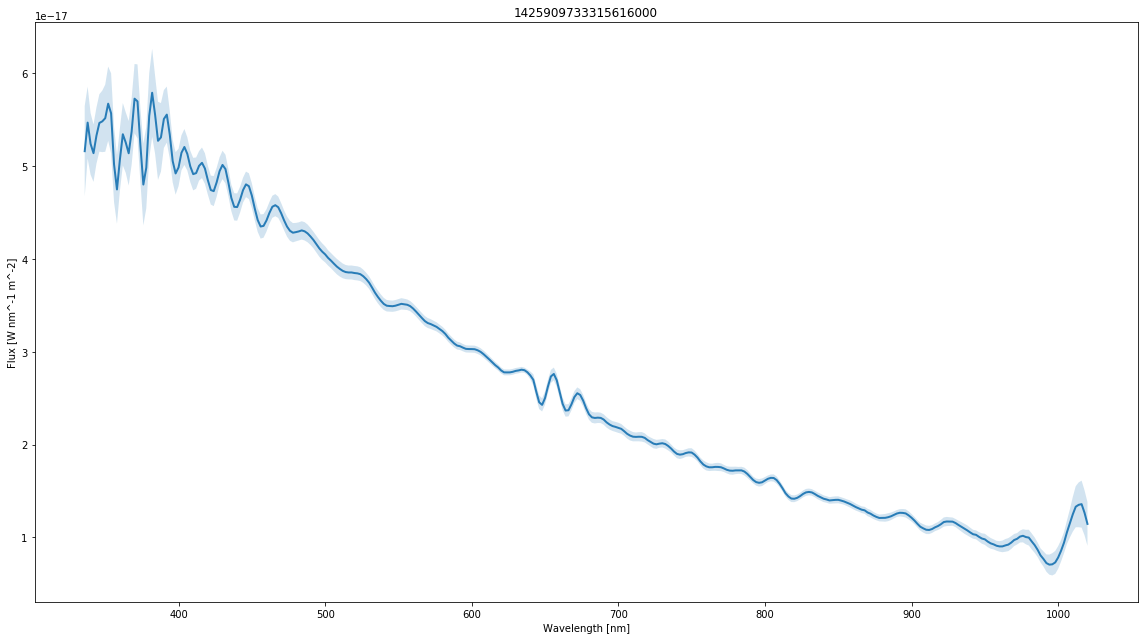

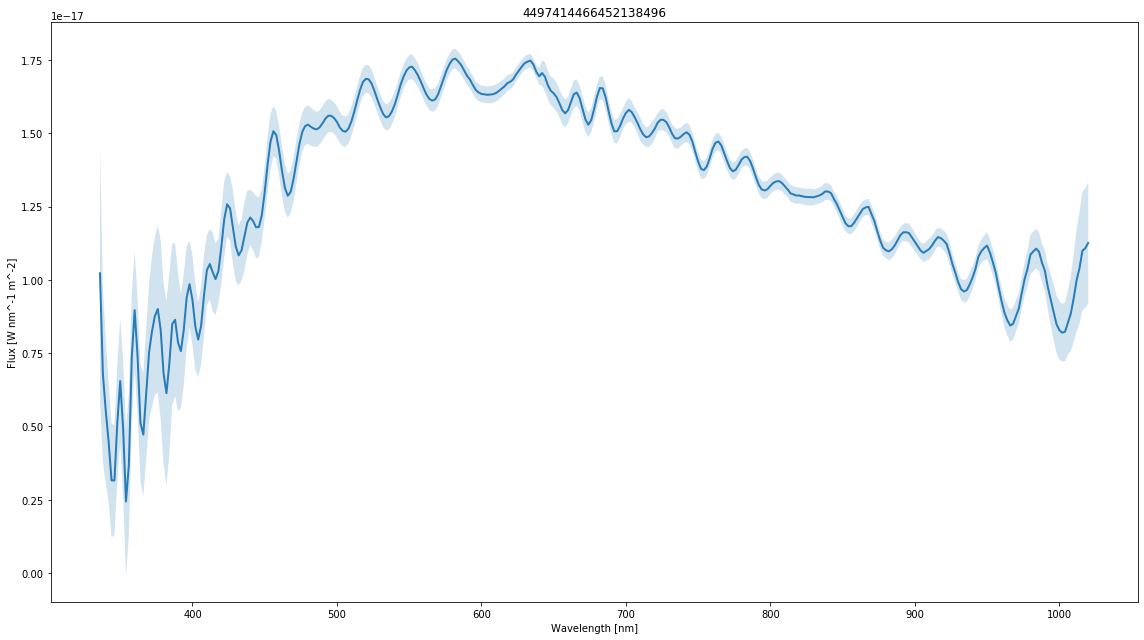

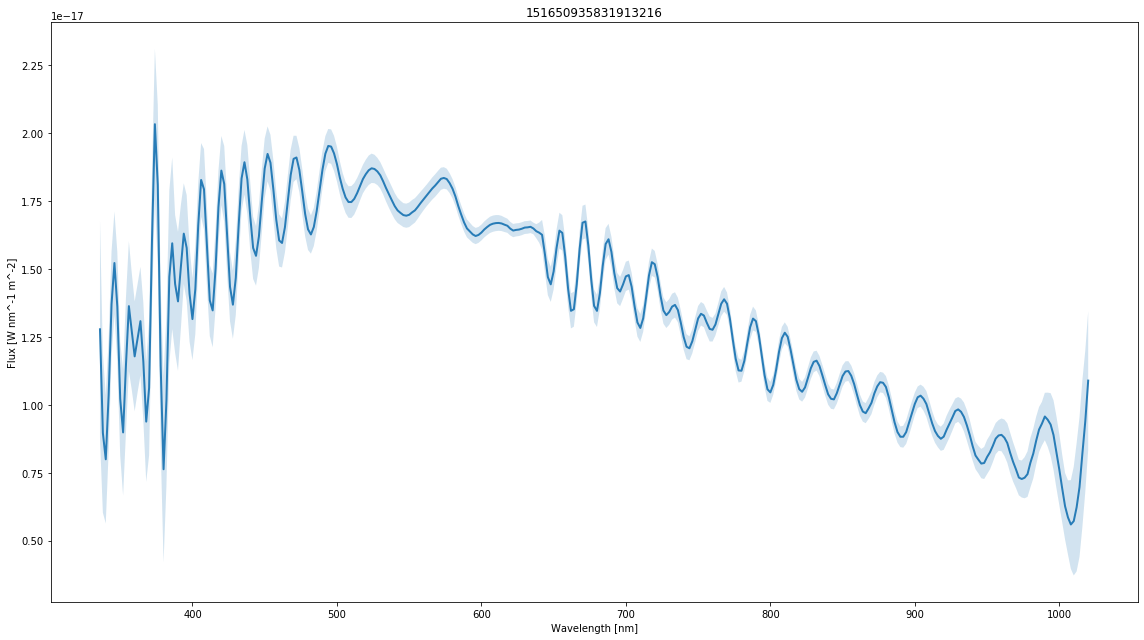

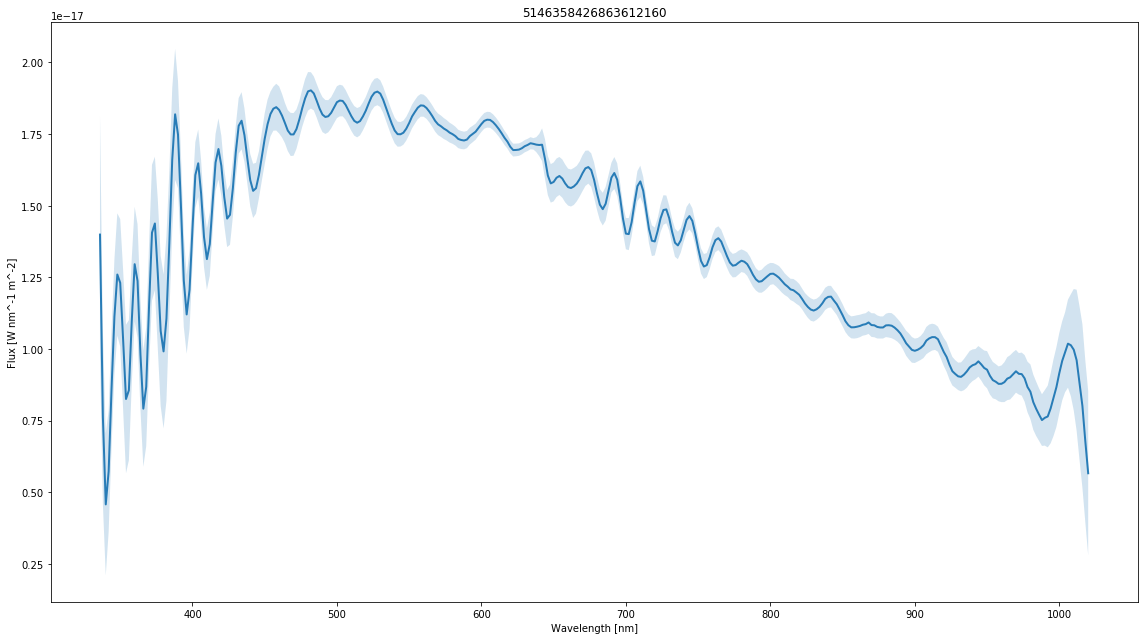

In [3]:
#356
from gaiaxpy import calibrate
f = '/home/nwal/Desktop/Random-Astro-master/GaiaBPRP/example.csv'
from gaiaxpy import plot_spectra
df = pd.read_csv(f) # The values in the DataFrame can be edited if the user wishes to do so.
calibrated_spectra, sampling = calibrate(df)
plot_spectra(calibrated_spectra, sampling=sampling)
f = '/home/nwal/Desktop/Random-Astro-master/GaiaBPRP/GD356L1.csv'
df = pd.read_csv(f) # The values in the DataFrame can be edited if the user wishes to do so.
calibrated_spectra, sampling = calibrate(df)
plot_spectra(calibrated_spectra, sampling=sampling)
f = '/home/nwal/Desktop/Random-Astro-master/GaiaBPRP/GD356L2.csv'
df = pd.read_csv(f) # The values in the DataFrame can be edited if the user wishes to do so.
calibrated_spectra, sampling = calibrate(df)
plot_spectra(calibrated_spectra, sampling=sampling)
f = '/home/nwal/Desktop/Random-Astro-master/GaiaBPRP/GD356L3.csv'
df = pd.read_csv(f) # The values in the DataFrame can be edited if the user wishes to do so.
calibrated_spectra, sampling = calibrate(df)
plot_spectra(calibrated_spectra, sampling=sampling)


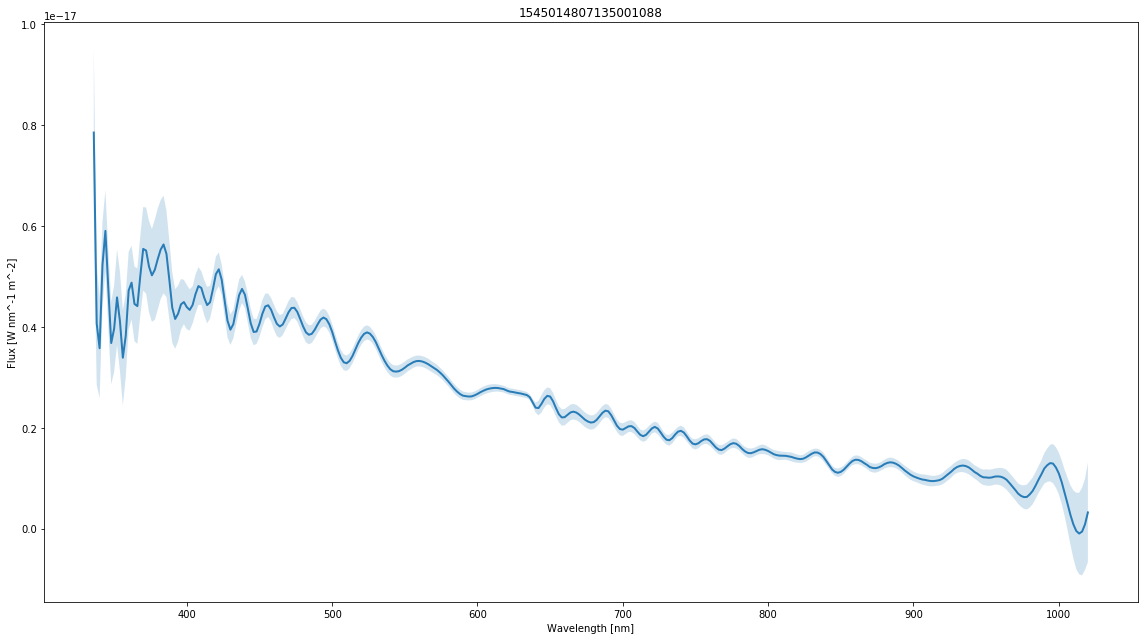

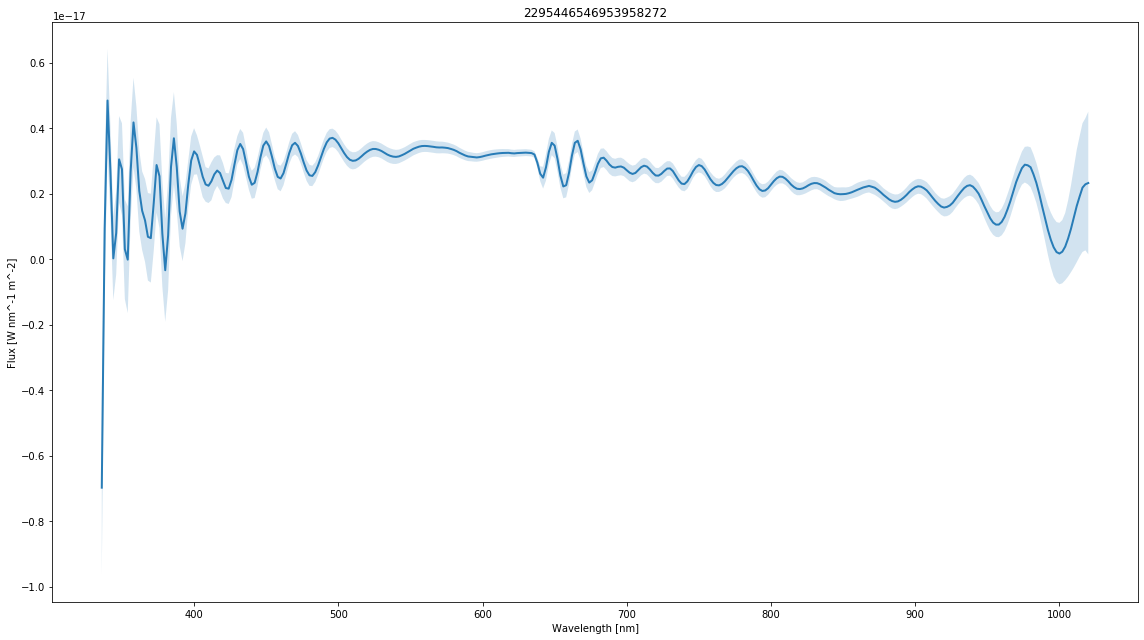

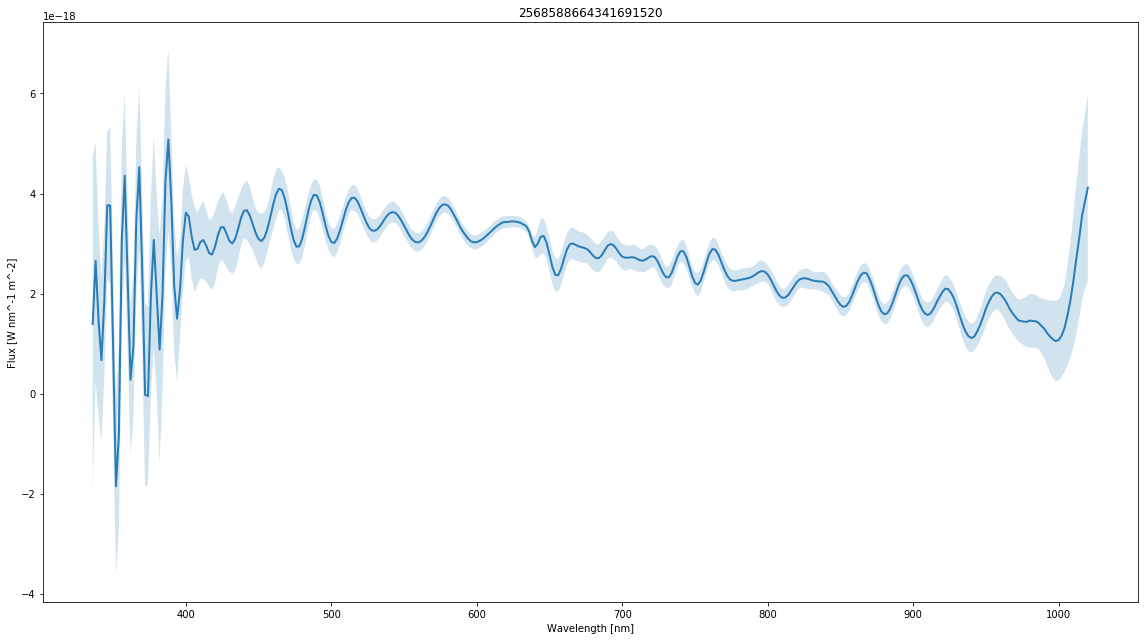

In [4]:
f = '/home/nwal/Desktop/Random-Astro-master/GaiaBPRP/bStar.csv'
df = pd.read_csv(f) # The values in the DataFrame can be edited if the user wishes to do so.
calibrated_spectra, sampling = calibrate(df)
plot_spectra(calibrated_spectra, sampling=sampling)

f = '/home/nwal/Desktop/Random-Astro-master/GaiaBPRP/S1.csv'
df = pd.read_csv(f) # The values in the DataFrame can be edited if the user wishes to do so.
calibrated_spectra, sampling = calibrate(df)
plot_spectra(calibrated_spectra, sampling=sampling)

f = '/home/nwal/Desktop/Random-Astro-master/GaiaBPRP/S2.csv'
df = pd.read_csv(f) # The values in the DataFrame can be edited if the user wishes to do so.
calibrated_spectra, sampling = calibrate(df)
plot_spectra(calibrated_spectra, sampling=sampling)


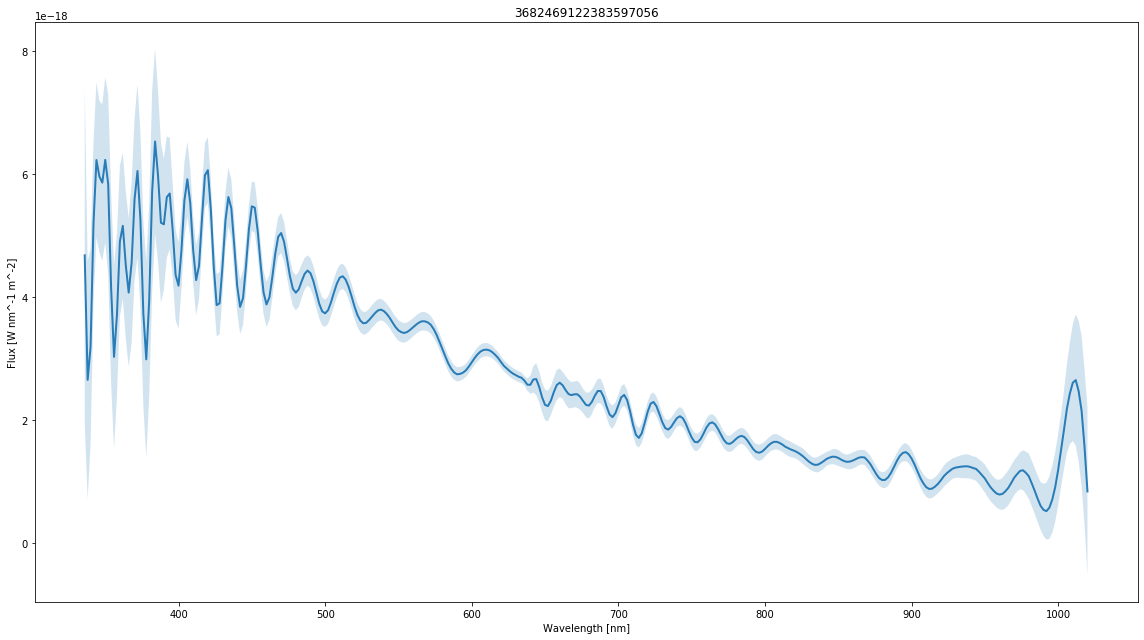

In [35]:
# Import the tool
from gaiaxpy import calibrate
# Path to file with XP CONTINUOUS RAW data (csv, ecsv, fits, or xml)
f = '/home/nwal/Desktop/Random-Astro-master/rStar.csv'
from gaiaxpy import plot_spectra
df = pd.read_csv(f) # The values in the DataFrame can be edited if the user wishes to do so.
calibrated_spectra, sampling = calibrate(df)
plot_spectra(calibrated_spectra, sampling=sampling)

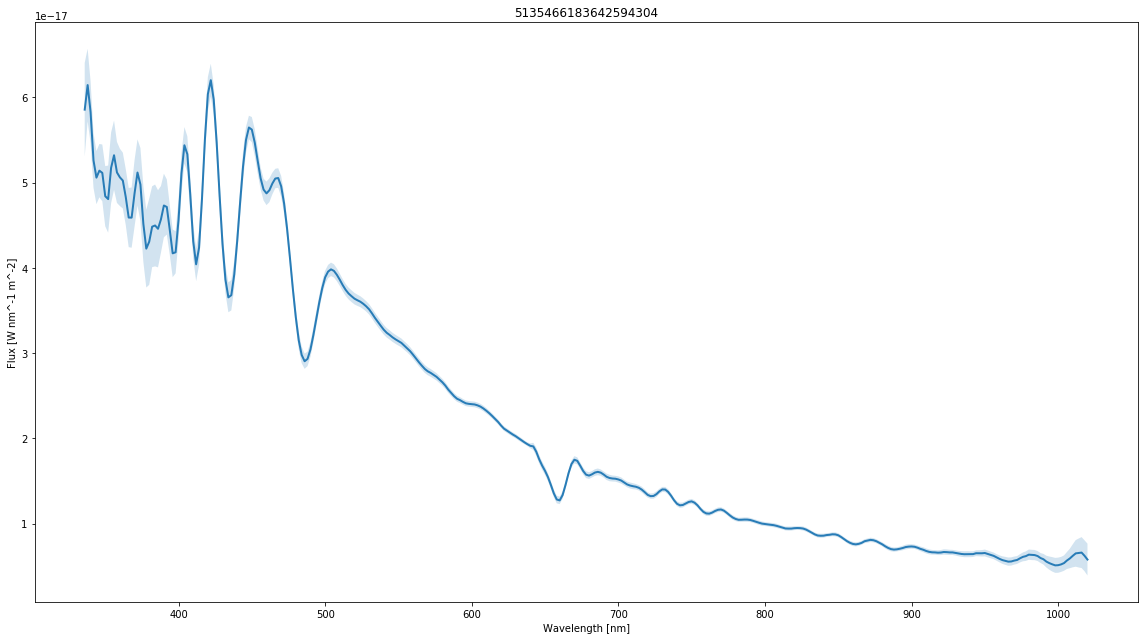

In [37]:
# Import the tool
from gaiaxpy import calibrate
# Path to file with XP CONTINUOUS RAW data (csv, ecsv, fits, or xml)
f = '/home/nwal/Desktop/Random-Astro-master/gd1400.csv'
from gaiaxpy import plot_spectra
df = pd.read_csv(f) # The values in the DataFrame can be edited if the user wishes to do so.
calibrated_spectra, sampling = calibrate(df)
plot_spectra(calibrated_spectra, sampling=sampling)

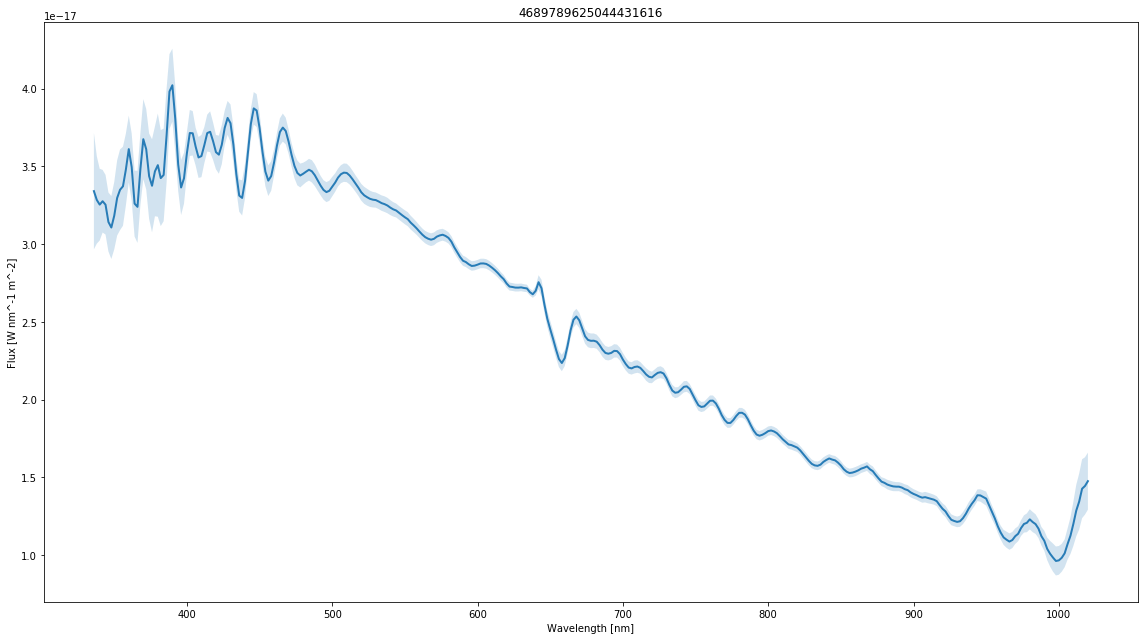

In [38]:
#wd0011-721

# Import the tool
from gaiaxpy import calibrate
# Path to file with XP CONTINUOUS RAW data (csv, ecsv, fits, or xml)
f = '/home/nwal/Desktop/Random-Astro-master/wd0011-721.csv'
from gaiaxpy import plot_spectra
df = pd.read_csv(f) # The values in the DataFrame can be edited if the user wishes to do so.
calibrated_spectra, sampling = calibrate(df)
plot_spectra(calibrated_spectra, sampling=sampling)

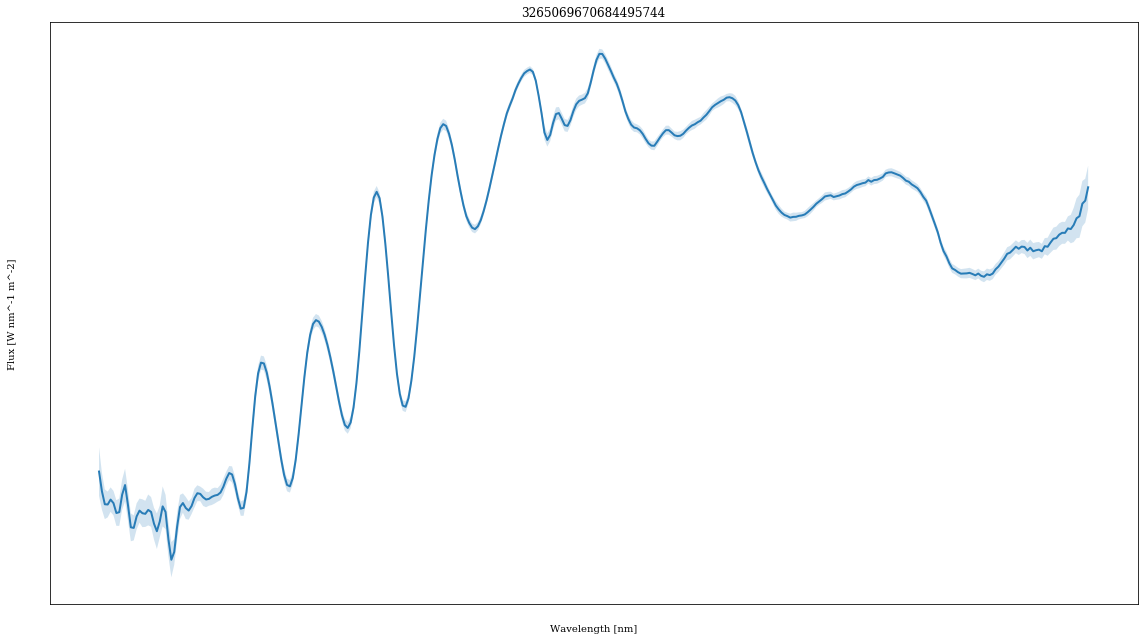

In [3]:
#wd0011-721

# Import the tool
from gaiaxpy import calibrate
# Path to file with XP CONTINUOUS RAW data (csv, ecsv, fits, or xml)
f = '/home/nwal/Desktop/Random-Astro-master/G77_61.csv'
from gaiaxpy import plot_spectra
df = pd.read_csv(f) # The values in the DataFrame can be edited if the user wishes to do so.
calibrated_spectra, sampling = calibrate(df)
plot_spectra(calibrated_spectra, sampling=sampling)

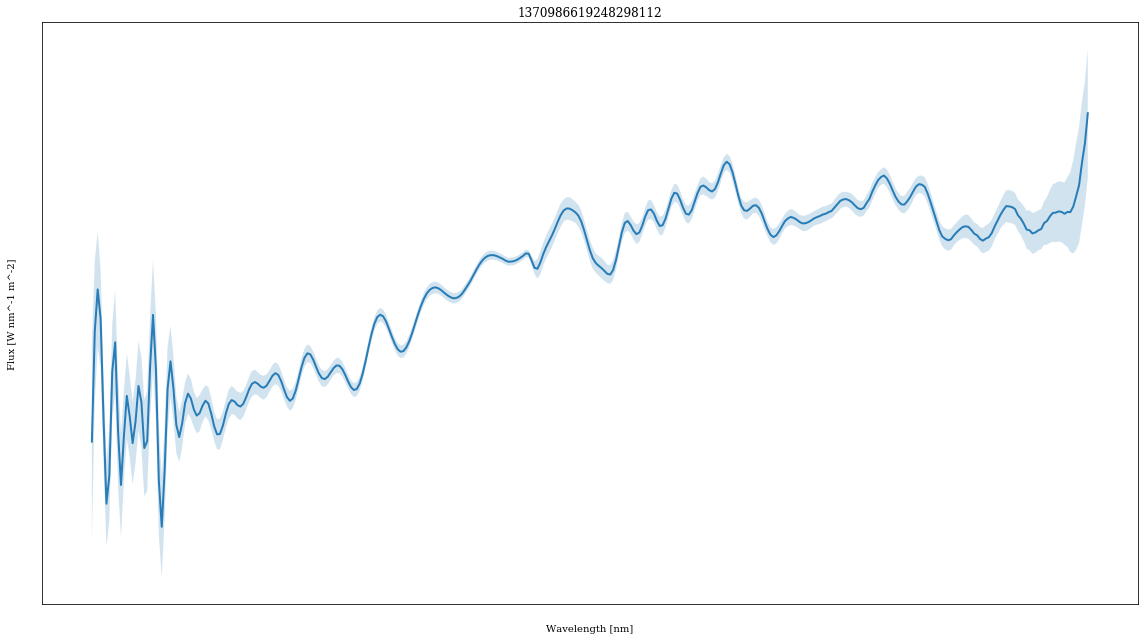

In [12]:
f = '/home/nwal/Desktop/Random-Astro-master/carbonSpectra/SDSS J154859.72+341821.7.csv'
df = pd.read_csv(f) # The values in the DataFrame can be edited if the user wishes to do so.
calibrated_spectra, sampling = calibrate(df)
plot_spectra(calibrated_spectra, sampling=sampling)